In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
!unzip /content/corn

Archive:  /content/corn.zip
   creating: corn/
   creating: corn/test/
   creating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (451).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (452).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (453).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (454).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (455).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (456).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (457).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (458).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (459).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (460).jpg  
  inflating: corn/test

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/corn/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/corn/val',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [5]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
50/50 [==============================] - 18s 89ms/step - loss: 0.8810 - accuracy: 0.6062 - val_loss: 0.6241 - val_accuracy: 0.7200
Epoch 2/30
50/50 [==============================] - 4s 74ms/step - loss: 0.4744 - accuracy: 0.7831 - val_loss: 0.3650 - val_accuracy: 0.8100
Epoch 3/30
50/50 [==============================] - 4s 71ms/step - loss: 0.3724 - accuracy: 0.8256 - val_loss: 0.3423 - val_accuracy: 0.8200
Epoch 4/30
50/50 [==============================] - 4s 88ms/step - loss: 0.3469 - accuracy: 0.8369 - val_loss: 0.3244 - val_accuracy: 0.8500
Epoch 5/30
50/50 [==============================] - 4s 71ms/step - loss: 0.2949 - accuracy: 0.8606 - val_loss: 0.3350 - val_accuracy: 0.8050
Epoch 6/30
50/50 [==============================] - 3s 69ms/step - loss: 0.2884 - accuracy: 0.8788 - val_loss: 0.3304 - val_accuracy: 0.8650
Epoch 7/30
50/50 [==============================] - 4s 85ms/step - loss: 0.2730 - accuracy: 0.8788 - val_loss: 0.3991 - val_accuracy: 0.8300
Epoch 8/30
5

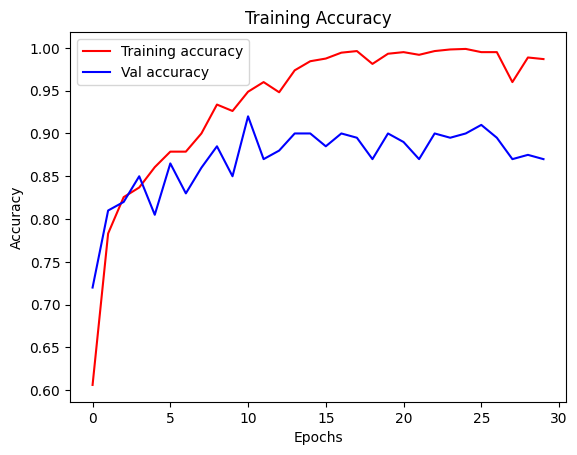

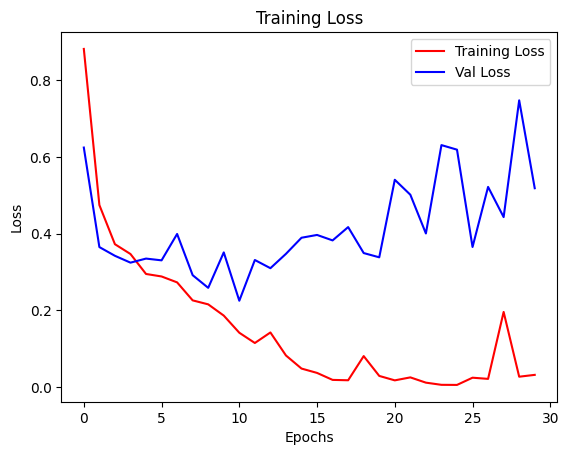

In [7]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()